# Flight Delay Prediction

In [14]:
# Load all the neccesary libraries
import pandas as pd
import tensorflow as tf
import seaborn as sns
seed = 1010
tf.random.set_seed(seed)

## Load the dataset 

In [15]:
# lets load both files into dataframe
df1 = pd.read_csv('../input/flight-delay-prediction/Jan_2019_ontime.csv')
df2 = pd.read_csv('../input/flight-delay-prediction/Jan_2020_ontime.csv')
df1.shape, df2.shape

((583985, 22), (607346, 22))

In [16]:
# Merge the datasets
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191331 entries, 0 to 1191330
Data columns (total 22 columns):
DAY_OF_MONTH             1191331 non-null int64
DAY_OF_WEEK              1191331 non-null int64
OP_UNIQUE_CARRIER        1191331 non-null object
OP_CARRIER_AIRLINE_ID    1191331 non-null int64
OP_CARRIER               1191331 non-null object
TAIL_NUM                 1188090 non-null object
OP_CARRIER_FL_NUM        1191331 non-null int64
ORIGIN_AIRPORT_ID        1191331 non-null int64
ORIGIN_AIRPORT_SEQ_ID    1191331 non-null int64
ORIGIN                   1191331 non-null object
DEST_AIRPORT_ID          1191331 non-null int64
DEST_AIRPORT_SEQ_ID      1191331 non-null int64
DEST                     1191331 non-null object
DEP_TIME                 1168315 non-null float64
DEP_DEL15                1168277 non-null float64
DEP_TIME_BLK             1191331 non-null object
ARR_TIME                 1167195 non-null float64
ARR_DEL15                1165231 non-null float64
CANCELLED

In [17]:
#lets view some rows of dataset
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


## Prepare the dataset for training

In [18]:
# check the correlation between attributes
df.corr()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
DAY_OF_MONTH,1.000000,-0.042553,-0.001265,-0.015823,-0.004971,-0.004971,-0.004963,-0.004963,-0.003349,-0.013177,0.006048,-0.005327,0.063046,0.000522,-0.020558,NaN
DAY_OF_WEEK,-0.042553,1.000000,0.007998,0.059044,0.005538,0.005538,0.005226,0.005226,0.005011,0.022601,0.001044,0.024707,0.008820,0.001541,0.019302,NaN
OP_CARRIER_AIRLINE_ID,-0.001265,0.007998,1.000000,0.437421,-0.047495,-0.047495,-0.047675,-0.047675,0.003234,0.035887,-0.015241,0.070229,0.017882,0.011691,-0.127043,NaN
OP_CARRIER_FL_NUM,-0.015823,0.059044,0.437421,1.000000,-0.054657,-0.054657,-0.059944,-0.059945,0.006485,0.024047,0.007673,0.033355,0.034782,0.007428,-0.347685,NaN
ORIGIN_AIRPORT_ID,-0.004971,0.005538,-0.047495,-0.054657,1.000000,1.000000,0.017462,0.017463,-0.032592,0.002847,-0.004194,0.007959,0.011872,-0.001090,0.089662,NaN
ORIGIN_AIRPORT_SEQ_ID,-0.004971,0.005538,-0.047495,-0.054657,1.000000,1.000000,0.017463,0.017463,-0.032592,0.002847,-0.004194,0.007959,0.011872,-0.001090,0.089662,NaN
DEST_AIRPORT_ID,-0.004963,0.005226,-0.047675,-0.059944,0.017462,0.017463,1.000000,1.000000,0.031905,0.009664,0.023973,0.010728,0.011055,0.003175,0.089691,NaN
DEST_AIRPORT_SEQ_ID,-0.004963,0.005226,-0.047675,-0.059945,0.017463,0.017463,1.000000,1.000000,0.031904,0.009664,0.023973,0.010728,0.011055,0.003175,0.089691,NaN
DEP_TIME,-0.003349,0.005011,0.003234,0.006485,-0.032592,-0.032592,0.031905,0.031904,1.000000,0.172707,0.668867,0.129090,0.003113,-0.001416,-0.021322,NaN
DEP_DEL15,-0.013177,0.022601,0.035887,0.024047,0.002847,0.002847,0.009664,0.009664,0.172707,1.000000,0.080924,0.716551,0.019339,0.020837,0.012579,NaN


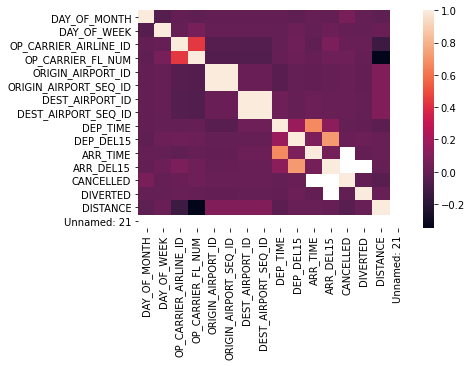

In [19]:
# plot heatmap for correlation
sns.heatmap(df.corr())

In [20]:
# Remove the columns not used in training
cols_to_drop = []
cols_to_drop.append('OP_UNIQUE_CARRIER')
cols_to_drop.append('OP_CARRIER_AIRLINE_ID')
cols_to_drop.append('OP_CARRIER')
cols_to_drop.append('ORIGIN_AIRPORT_SEQ_ID')
cols_to_drop.append('ORIGIN')
cols_to_drop.append('DEST_AIRPORT_SEQ_ID')
cols_to_drop.append('DEST')
cols_to_drop.append('DEP_TIME')
cols_to_drop.append('ARR_TIME')
cols_to_drop.append('ARR_DEL15')
cols_to_drop.append('CANCELLED')
cols_to_drop.append('DIVERTED')
cols_to_drop.append('DISTANCE')
cols_to_drop.append('Unnamed: 21')

df.drop(columns=cols_to_drop, inplace=True)

In [21]:
# check for NaN values in the dataset
df.isna().any()

DAY_OF_MONTH         False
DAY_OF_WEEK          False
TAIL_NUM              True
OP_CARRIER_FL_NUM    False
ORIGIN_AIRPORT_ID    False
DEST_AIRPORT_ID      False
DEP_DEL15             True
DEP_TIME_BLK         False
dtype: bool

In [22]:
totalrows = df.shape[0]

for col in df.columns:
    nas = sum(df[col].isna())
    if nas:
        print(f'Column {col} has {nas} ({(nas/totalrows)*100:.2f}% of total) NAs.')
print('Done looking for NAs')

Column TAIL_NUM has 3241 (0.27% of total) NAs.
Column DEP_DEL15 has 23054 (1.94% of total) NAs.
Done looking for NAs


In [23]:
# drop the NaN values in the dataset
df.dropna(inplace=True)
df.shape

(1168277, 8)

## Split dataset for training and evaluation 

In [24]:
split   = 0.8 # 80/20 split for training and evaluation
dftrain = df.sample(frac=split, random_state=seed) 
dfeval  = df.drop(dftrain.index)
dftrain.shape, dfeval.shape

((934622, 8), (233655, 8))

In [25]:
# Extract and remove the label (to be predicted) set
y_train = dftrain.pop('DEP_DEL15')
y_eval  = dfeval.pop('DEP_DEL15')
y_train.shape, y_eval.shape

((934622,), (233655,))

## Using Estimator

In [26]:
dftrain.dtypes

DAY_OF_MONTH          int64
DAY_OF_WEEK           int64
TAIL_NUM             object
OP_CARRIER_FL_NUM     int64
ORIGIN_AIRPORT_ID     int64
DEST_AIRPORT_ID       int64
DEP_TIME_BLK         object
dtype: object

#### Create Feature Columns

In [27]:
def onehot_catgcol(df, column):
    fc = tf.feature_column
    values  = df[column].unique()
    cat_col = fc.categorical_column_with_vocabulary_list(column, values)
    return (fc.indicator_column(cat_col))

In [28]:
categorical_cols = ['TAIL_NUM', 'DEP_TIME_BLK']
numeric_cols = [i for i in dftrain.columns if i not in categorical_cols]

categorical_cols, numeric_cols

(['TAIL_NUM', 'DEP_TIME_BLK'],
 ['DAY_OF_MONTH',
  'DAY_OF_WEEK',
  'OP_CARRIER_FL_NUM',
  'ORIGIN_AIRPORT_ID',
  'DEST_AIRPORT_ID'])

In [29]:
# tf.estimator requires the features to be Tensors
fc = tf.feature_column
features = [fc.numeric_column(i)  for i in numeric_cols]
fc_catgs = [onehot_catgcol(df, i) for i in categorical_cols]
features.extend(fc_catgs)

len(features)

7

#### Create Input Function for both Training and Evaluation

In [30]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

#### Set up Hyper Parameters

In [31]:
params = {
    'n_trees':50,
    'max_depth':3,
    'n_batches_per_layer':1,
    'center_bias':True
}
classifier = tf.estimator.BoostedTreesClassifier(features, **params)

#### Train

In [32]:
classifier.train(
    input_fn=lambda: input_fn(dftrain, y_train, training=True),
    max_steps=100)

#### Evaluation

In [33]:
eval_result = classifier.evaluate(
                input_fn=lambda: input_fn(dfeval, y_eval, training=False))

print(f'Evaluation set accuracy = {eval_result["accuracy"]*100:.2f}%')

Evaluation set accuracy = 84.30%


In [34]:
pd.Series(eval_result).to_frame()

,0
accuracy,0.842991
accuracy_baseline,0.845233
auc,0.561657
auc_precision_recall,0.179974
average_loss,0.433106
label/mean,0.154767
loss,0.433081
precision,0.185851
prediction/mean,0.154358
recall,0.004286
